In [1]:
import preprocessing
import utils
import implementations
import helpers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y, X, ids = helpers.load_csv_data(path="resources/train.csv")

In [3]:
lambdas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
# degrees = [i for i in range(13, 17)]
degrees = [15,16,15]

x_tr, x_val, y_tr, y_val = utils.split_data(X, y, 0.8)
accuracy_list = []
loss_list = []
training_groups = utils.group_by_categories(x_tr, column=22)
validation_groups = utils.group_by_categories(x_val, column=22)

# total_correct = 0
for lambda_ in lambdas:
    print(f'*******lamda = {lambda_}*******')
    losses = []
    accuracys = []
    total_loss = 0
    total_correct = 0
    for i, (training_group_idx, validation_group_idx, degree) in enumerate(
        zip(training_groups, validation_groups, degrees)
    ):
        print("PRI_jet_num =", i)
        print("-" * 30)

        x_tr_i, y_tr_i = x_tr[training_group_idx], y_tr[training_group_idx]
        x_val_i, y_val_i = x_val[validation_group_idx], y_val[validation_group_idx]

        x_tr_i, x_val_i, y_tr_i, y_val_i = preprocessing.preprocess_data(
            x_tr_i, x_val_i, y_tr_i, y_val_i, degree=degree
            )


        weights, loss = implementations.ridge_regression(y_tr_i, x_tr_i, lambda_)


        y_pred = np.array([-1 if x @ weights < 0 else 1 for x in x_val_i])
        correct_predict = (y_pred == y_val_i).sum()
        print("Group accuracy", correct_predict / len(y_val_i))
        accuracys.append(correct_predict / len(y_val_i))
        losses.append(loss)
        total_correct += correct_predict
        total_loss += loss
        # y_val[validation_group_idx] = y_pred
        print("*" * 30)

    print("Validation accuracy", total_correct / len(y_val))
    accuracys.append(total_correct / len(y_val))
    losses.append(total_loss)
    accuracy_list.append(accuracys)
    loss_list.append(losses)



*******lamda = 0*******
PRI_jet_num = 0
------------------------------
Group accuracy 0.7608434338375238
******************************
PRI_jet_num = 1
------------------------------
Group accuracy 0.8039708631470379
******************************
PRI_jet_num = 2
------------------------------
Group accuracy 0.8440190069554439
******************************
Validation accuracy 0.79838
*******lamda = 0.0001*******
PRI_jet_num = 0
------------------------------
Group accuracy 0.8499949914855254
******************************
PRI_jet_num = 1
------------------------------
Group accuracy 0.8129955521175788
******************************
PRI_jet_num = 2
------------------------------
Group accuracy 0.8436058122718821
******************************
Validation accuracy 0.83666
*******lamda = 0.0005*******
PRI_jet_num = 0
------------------------------
Group accuracy 0.8489932885906041
******************************
PRI_jet_num = 1
------------------------------
Group accuracy 0.81267324179720

In [4]:
accuracy_list

[[0.7608434338375238, 0.8039708631470379, 0.8440190069554439, 0.79838],
 [0.8499949914855254, 0.8129955521175788, 0.8436058122718821, 0.83666],
 [0.8489932885906041, 0.8126732417972024, 0.8442944700778183, 0.83636],
 [0.8486426925773816, 0.8051311803003932, 0.8445010674195992, 0.83394],
 [0.8483922668536512, 0.8107393798749436, 0.8431926175883203, 0.8352],
 [0.8481919262746669, 0.8092567524012119, 0.8428482886853522, 0.83456],
 [0.847540819392968, 0.8057758009411461, 0.8386474760691413, 0.832],
 [0.8468897125112692, 0.8031973183781345, 0.8362371737483645, 0.83024],
 [0.8435340078132826, 0.7959775672017018, 0.8291439983472213, 0.8246],
 [0.8427326454973455, 0.7941726294075936, 0.8213621651401418, 0.82146],
 [0.8370730241410398, 0.7772835686198672, 0.8002203704978996, 0.80782]]

In [5]:
accuracys = np.array(accuracy_list).T
accuracys

array([[0.76084343, 0.84999499, 0.84899329, 0.84864269, 0.84839227,
        0.84819193, 0.84754082, 0.84688971, 0.84353401, 0.84273265,
        0.83707302],
       [0.80397086, 0.81299555, 0.81267324, 0.80513118, 0.81073938,
        0.80925675, 0.8057758 , 0.80319732, 0.79597757, 0.79417263,
        0.77728357],
       [0.84401901, 0.84360581, 0.84429447, 0.84450107, 0.84319262,
        0.84284829, 0.83864748, 0.83623717, 0.829144  , 0.82136217,
        0.80022037],
       [0.79838   , 0.83666   , 0.83636   , 0.83394   , 0.8352    ,
        0.83456   , 0.832     , 0.83024   , 0.8246    , 0.82146   ,
        0.80782   ]])

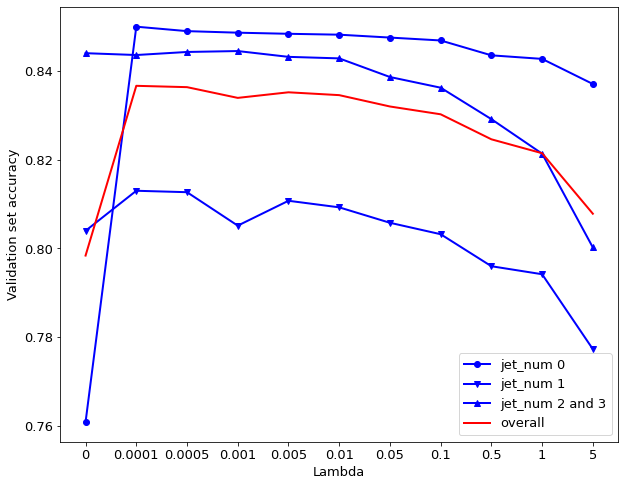

In [6]:
x = range(len(lambdas))
plt.figure(figsize=(10,8))
plt.plot(x,accuracys[0],'bo-',label = 'jet_num 0',linewidth=2)
plt.plot(x,accuracys[1],'bv-',label = 'jet_num 1',linewidth=2)
plt.plot(x,accuracys[2],'b^-',label = 'jet_num 2 and 3',linewidth=2)
plt.plot(x,accuracys[3],'r',label = 'overall',linewidth=2)
plt.xticks(x, lambdas,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Lambda',fontsize=13)
plt.ylabel('Validation set accuracy',fontsize=13)
plt.legend(fontsize=13)

In [9]:
#lambdas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
degrees = [i for i in range(2, 17)]
lambdas = [0.0001, 0.0001, 0.0005]
#degrees = [15,16,15]

x_tr, x_val, y_tr, y_val = utils.split_data(X, y, 0.8)
accuracy_list = []
loss_list = []
training_groups = utils.group_by_categories(x_tr, column=22)
validation_groups = utils.group_by_categories(x_val, column=22)

# total_correct = 0
for degree in degrees:
    print(f'*******degree = {degree}*******')
    losses = []
    accuracys = []
    total_loss = 0
    total_correct = 0
    for i, (training_group_idx, validation_group_idx, lambda_) in enumerate(
        zip(training_groups, validation_groups, lambdas)
    ):
        print("PRI_jet_num =", i)
        print("-" * 30)

        x_tr_i, y_tr_i = x_tr[training_group_idx], y_tr[training_group_idx]
        x_val_i, y_val_i = x_val[validation_group_idx], y_val[validation_group_idx]

        x_tr_i, x_val_i, y_tr_i, y_val_i = preprocessing.preprocess_data(
            x_tr_i, x_val_i, y_tr_i, y_val_i, degree=degree
            )


        weights, loss = implementations.ridge_regression(y_tr_i, x_tr_i, lambda_)


        y_pred = np.array([-1 if x @ weights < 0 else 1 for x in x_val_i])
        correct_predict = (y_pred == y_val_i).sum()
        print("Group accuracy", correct_predict / len(y_val_i))
        accuracys.append(correct_predict / len(y_val_i))
        losses.append(loss)
        total_correct += correct_predict
        total_loss += loss
        # y_val[validation_group_idx] = y_pred
        print("*" * 30)

    print("Validation accuracy", total_correct / len(y_val))
    accuracys.append(total_correct / len(y_val))
    losses.append(total_loss)
    accuracy_list.append(accuracys)
    loss_list.append(losses)



*******degree = 2*******
PRI_jet_num = 0
------------------------------
Group accuracy 0.8397226548761493
******************************
PRI_jet_num = 1
------------------------------
Group accuracy 0.7920414105467486
******************************
PRI_jet_num = 2
------------------------------
Group accuracy 0.8211992897145198
******************************
Validation accuracy 0.81956
*******degree = 3*******
PRI_jet_num = 0
------------------------------
Group accuracy 0.8394714364668643
******************************
PRI_jet_num = 1
------------------------------
Group accuracy 0.7921061145260434
******************************
PRI_jet_num = 2
------------------------------
Group accuracy 0.8216090697992078
******************************
Validation accuracy 0.8196
*******degree = 4*******
PRI_jet_num = 0
------------------------------
Group accuracy 0.8418831331960006
******************************
PRI_jet_num = 1
------------------------------
Group accuracy 0.7960530572630217
*****

In [10]:
accuracys = np.array(accuracy_list).T
accuracys

array([[0.83972265, 0.83947144, 0.84188313, 0.84188313, 0.84198362,
        0.84273728, 0.84318947, 0.84429483, 0.84519922, 0.84540019,
        0.84595287, 0.84570165, 0.8461036 , 0.84630458, 0.84735969],
       [0.79204141, 0.79210611, 0.79605306, 0.79689421, 0.79967648,
        0.80090586, 0.80349401, 0.80582336, 0.80634099, 0.80731155,
        0.80789389, 0.80841152, 0.80867033, 0.80834681, 0.8097056 ],
       [0.82119929, 0.82160907, 0.82632154, 0.82748258, 0.82994126,
        0.83219506, 0.83431225, 0.83765879, 0.84134681, 0.84230296,
        0.84489824, 0.84510313, 0.84551291, 0.84626417, 0.84592269],
       [0.81956   , 0.8196    , 0.82316   , 0.82376   , 0.82538   ,
        0.82672   , 0.82832   , 0.83046   , 0.83206   , 0.83272   ,
        0.83388   , 0.834     , 0.83436   , 0.83456   , 0.8353    ]])

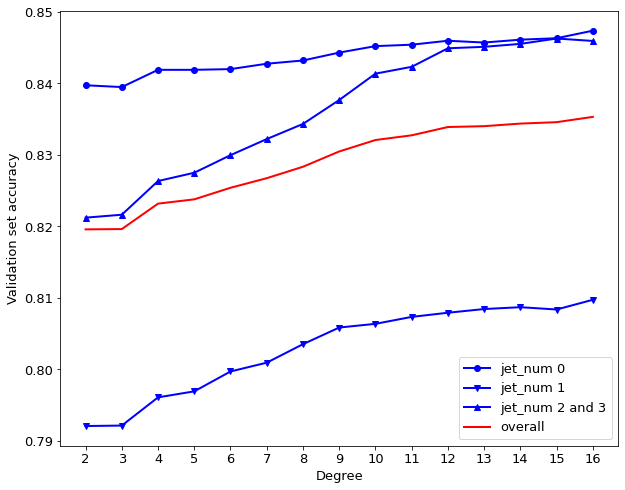

In [12]:
x = range(len(degrees))
plt.figure(figsize=(10,8))
plt.plot(x,accuracys[0],'bo-',label = 'jet_num 0',linewidth=2)
plt.plot(x,accuracys[1],'bv-',label = 'jet_num 1',linewidth=2)
plt.plot(x,accuracys[2],'b^-',label = 'jet_num 2 and 3',linewidth=2)
plt.plot(x,accuracys[3],'r',label = 'overall',linewidth=2)
plt.xticks(x, degrees,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Degree',fontsize=13)
plt.ylabel('Validation set accuracy',fontsize=13)
plt.legend(fontsize=13)